## Set Up

### Import & define & read src data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_raw_table(src_path: str, dst_path, column_labels: list, filter_dict: dict = None):
    '''
    Trích các cột cần trong dim job và đưa ra 1 file csv mới là tham số truyền vô
    Thêm jobid va`o
    Lấy các cột trong column_labels
    Lọc theo dict với mỗi key là array of not accepted value
    '''
    df = pd.read_csv(src_path, encoding='ISO-8859-1')

    for col, not_value in filter_dict.items():
        df = df[~df[col].isin(not_value)]

    df = df[column_labels]
    df.reset_index(drop=True, inplace=True)

    df.rename({
        'PERSONID': 'person_id',
        'PRDTIND1': 'detail_industry',
        'PRDTOCC1': 'detail_occupation',
        'PRTAGE': 'age',
        'PEMARITL': 'marital_status',
        'PESEX': 'sex',
        'PEEDUCA': 'education_level',
        'PTDTRACE': 'race',
        'PRFTLF': 'ft/pt',
        'GESTFIPS': 'state',
        'GTCBSA': 'metropolitan',
        'PEHRUSL1': 'hours_a_week',
        'PUHROT1': 'last_week_OT', #1 yes, 2 no
        'PUHROT2': 'additional_hours_OT',
        'PEERNHRO': 'usual_hours',
        'PRERNHLY': 'hourly_rate',
        'PRERNWA': 'weekly_rate',
        'PEDISEAR': 'deaf_diff_hearing',
        'PEDISEYE': 'blind_diff_seeing_glass',
        'PEDISREM': 'diff_concerntrating_remembering_decision',
        'PEDISPHY': 'diff_climbing_walking',
        'PEDISDRS': 'diff_dressing_bathing',
        'PRDISFLG': 'disability_issue', #1 yes, 2 no
    },
    axis=1, inplace=True)
    
    #print(df.head())
    df.to_csv(dst_path, index=False)

In [4]:
columns_to_get = ['PERSONID', 'PRDTIND1', 'PRDTOCC1', 'PRTAGE', 'PEMARITL', 'PESEX', 'PEEDUCA', 'PTDTRACE', 'PRFTLF', 'GTCBSA',
                   'PEHRUSL1', 'PEDISEAR', 'PEDISEYE', 'PEDISREM', 'PEDISPHY', 'PEDISDRS', 'PRDISFLG']
dict_to_filter = {
    #Only employed
    'PREMPNOT': [-1,2,3,4],
    #Only have 1 job
	'PEMJOT': [-1,1], 
    #Only if they know which city they 're in => which metropolitan is not 0
    'GTINDVPC': [0],
}

get_raw_table('./src/filtered_cps.csv', './temp/employment.csv', column_labels= columns_to_get, filter_dict=dict_to_filter)
test = pd.read_csv('./temp/employment.csv')
print(test.head())

   person_id  detail_industry  detail_occupation  age  marital_status  sex  \
0       4964               42                 10   51               1    1   
1       4965               41                 10   66               6    2   
2       4966               51                  1   47               4    1   
3       4971               45                 15   48               4    2   
4       4972               38                  1   31               6    1   

   education_level  race  ft/pt  metropolitan  hours_a_week  \
0               44     1      1         38060            50   
1               44     1      1         38060            40   
2               44     1      1         38060            45   
3               43     1      1         38060            40   
4               40     1      1         38060            48   

   deaf_diff_hearing  blind_diff_seeing_glass  \
0                  2                        2   
1                  2                        2   
2    

### Convert Foreign key to Value 

In [5]:
detail_industry_df = pd.read_csv('./src/detail_industry.csv')
detail_occupation_df = pd.read_csv('./src/detail_occupation.csv')
marital_status_df = pd.read_csv('./src/marital_status.csv')
education_df = pd.read_csv('./src/education.csv')
race_df = pd.read_csv('./src/race.csv')
metropolitan_df = pd.read_csv('./src/metropolitan.csv')

raw_df = pd.read_csv('./temp/employment.csv')
raw_df = pd.merge(raw_df, detail_industry_df, left_on='detail_industry', right_on='detail_industry_id')
raw_df = pd.merge(raw_df, detail_occupation_df, left_on='detail_occupation', right_on='detail_occupation_id')
raw_df = pd.merge(raw_df, marital_status_df, left_on='marital_status', right_on='marital_status_id')
raw_df = pd.merge(raw_df, education_df, left_on='education_level', right_on='education_id')
raw_df = pd.merge(raw_df, race_df, left_on='race', right_on='race_id')
raw_df = pd.merge(raw_df, metropolitan_df, left_on='metropolitan', right_on='metropolitan_id')

raw_df.drop(['detail_industry','detail_occupation', 'marital_status','education_level', 'race', 'metropolitan',
             'detail_industry_id', 'detail_occupation_id', 'marital_status_id', 'education_id', 'race_id', 'metropolitan_id', 'foreign_state_id'],
            axis=1, inplace=True)
raw_df.rename(mapper={
    'detail_industry_value': 'industry',
    'detail_occupation_value': 'occupation',
    'marital_status_value': 'marital_status',
    'education_value': 'education',
    'race_value': 'race',
    'metropolitan_value': 'metropolitan',
}, axis=1, inplace=True)

print(raw_df.head())


   person_id  age  sex  ft/pt  hours_a_week  deaf_diff_hearing  \
0       4964   51    1      1            50                  2   
1       5069   39    2      1            40                  2   
2       5068   40    1      1            40                  2   
3       5199   56    2      1            40                  2   
4       5712   46    1      1            60                  2   

   blind_diff_seeing_glass  diff_concerntrating_remembering_decision  \
0                        2                                         2   
1                        2                                         2   
2                        2                                         2   
3                        2                                         2   
4                        2                                         2   

   diff_climbing_walking  diff_dressing_bathing  disability_issue  \
0                      2                      2                 2   
1                      2        

### Explore cols 's values and count , examples


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7873 entries, 0 to 7872
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   person_id                                 7873 non-null   int64 
 1   age                                       7873 non-null   int64 
 2   sex                                       7873 non-null   int64 
 3   ft/pt                                     7873 non-null   int64 
 4   hours_a_week                              7873 non-null   int64 
 5   deaf_diff_hearing                         7873 non-null   int64 
 6   blind_diff_seeing_glass                   7873 non-null   int64 
 7   diff_concerntrating_remembering_decision  7873 non-null   int64 
 8   diff_climbing_walking                     7873 non-null   int64 
 9   diff_dressing_bathing                     7873 non-null   int64 
 10  disabili

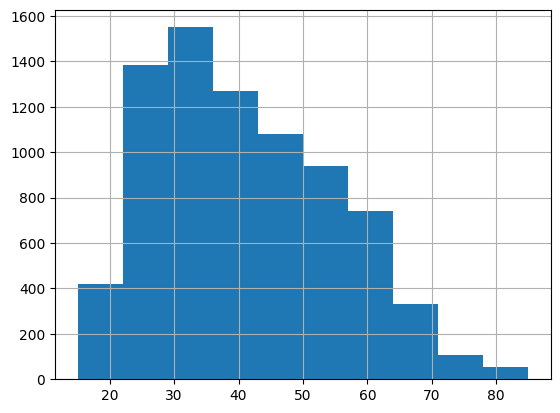

In [6]:
#select numeric and category columns
#numeric_cols = raw_df.select_dtypes(include=['int64', 'float64']).columns
#category_cols = raw_df.select_dtypes(include=['object']).columns
print('\n____________ Dataset info ____________')
print(raw_df.info())
print('\n____________ Some Data Examples ____________')
#print(raw_df.head(2))
print('\n____________ Features Values and count ____________')

#region Print all values and count of each feature
print(raw_df['age'].value_counts(),'\n')
print(raw_df['hours_a_week'].value_counts(),'\n') #-4 have 443 values => have to fillby a value
print(raw_df['industry'].value_counts(),'\n')
print(raw_df['occupation'].value_counts(),'\n')
print(raw_df['marital_status'].value_counts(),'\n')
print(raw_df['education'].value_counts(),'\n')
print(raw_df['race'].value_counts(),'\n')
print(raw_df['metropolitan'].value_counts(),'\n')
#endregion

raw_df['age'].hist()
print("Num:",len(raw_df[raw_df['hours_a_week'] == 0])) #5 giá trị 0
#raw_df['hours_a_week'].hist()


### Plotting hist for more insights

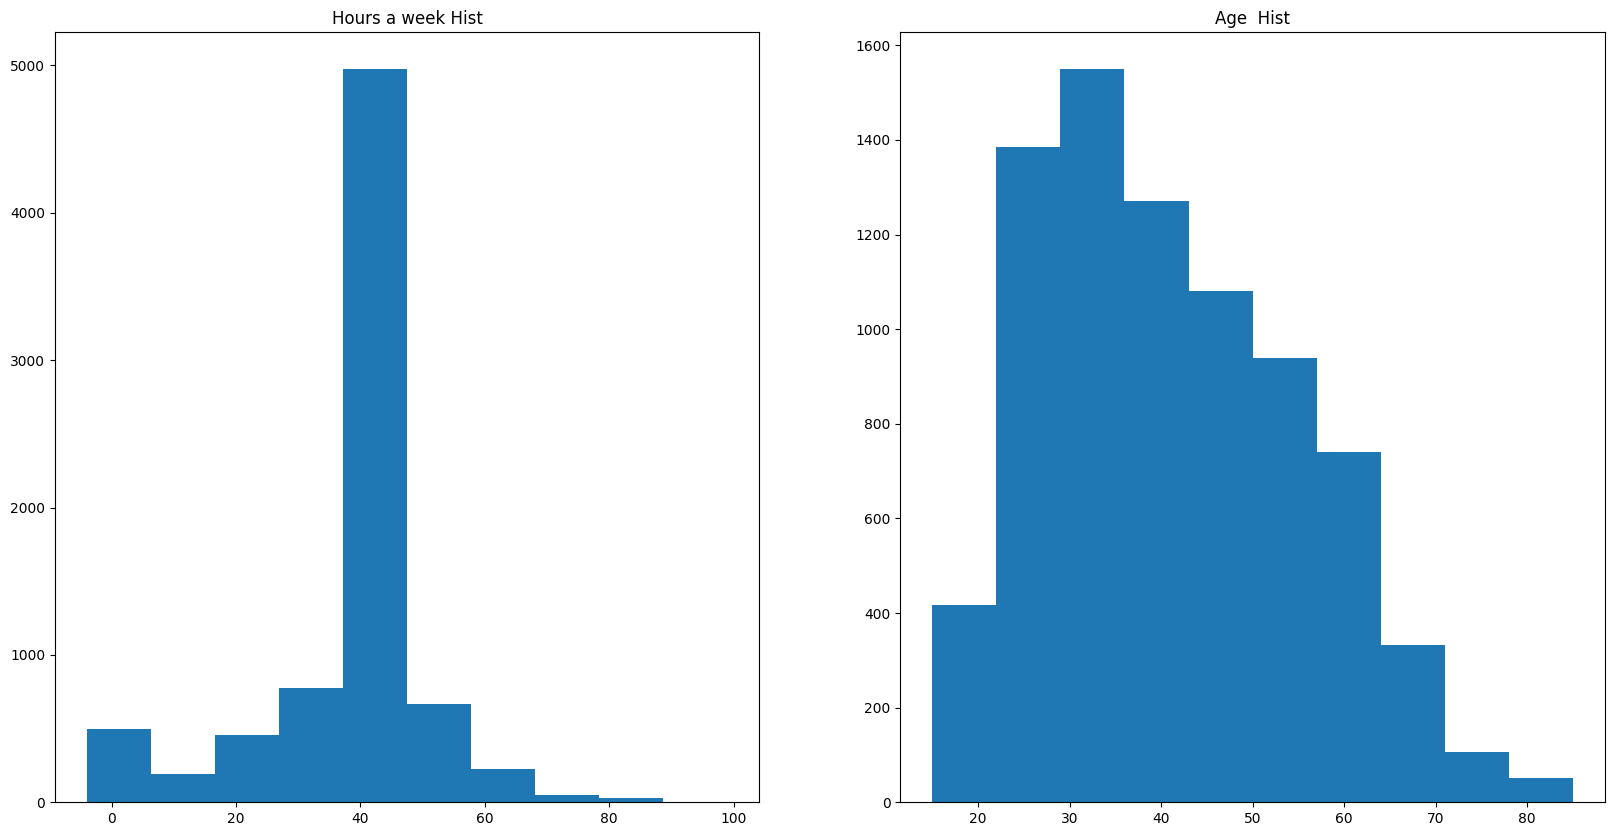

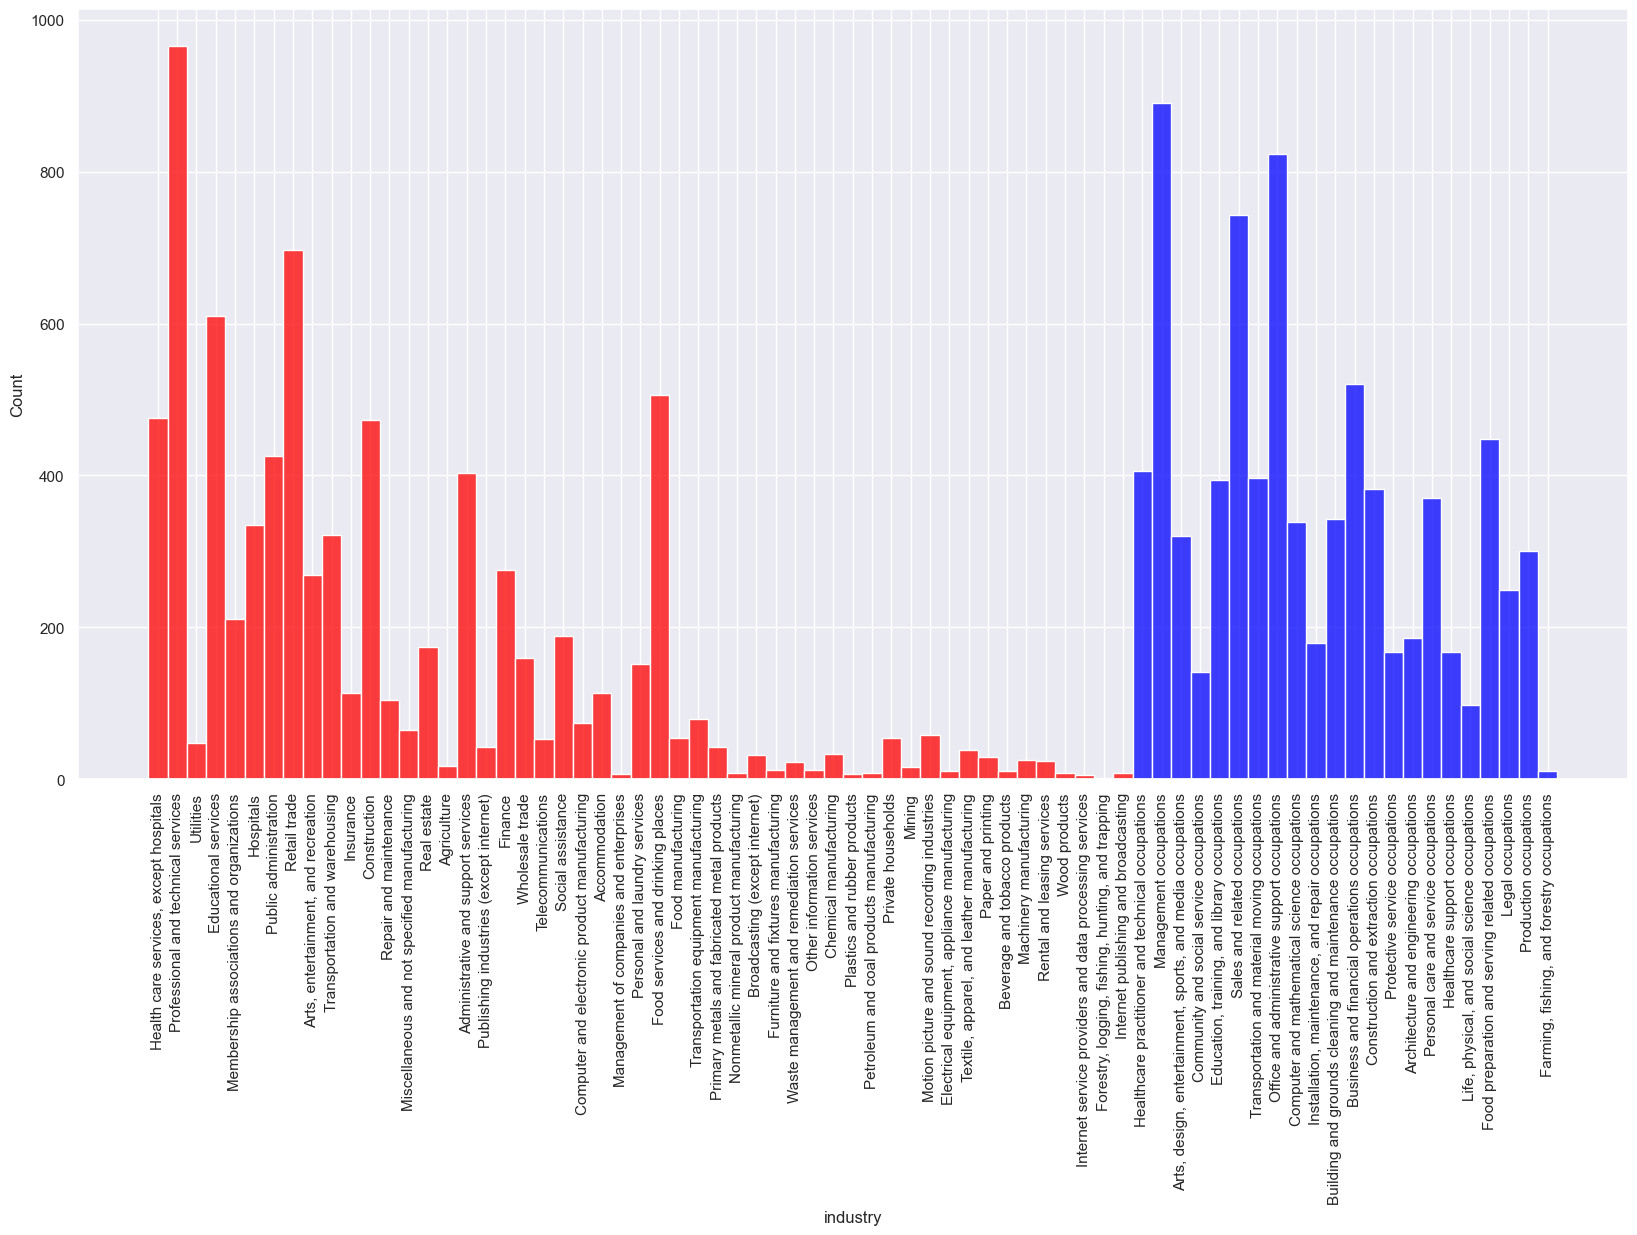

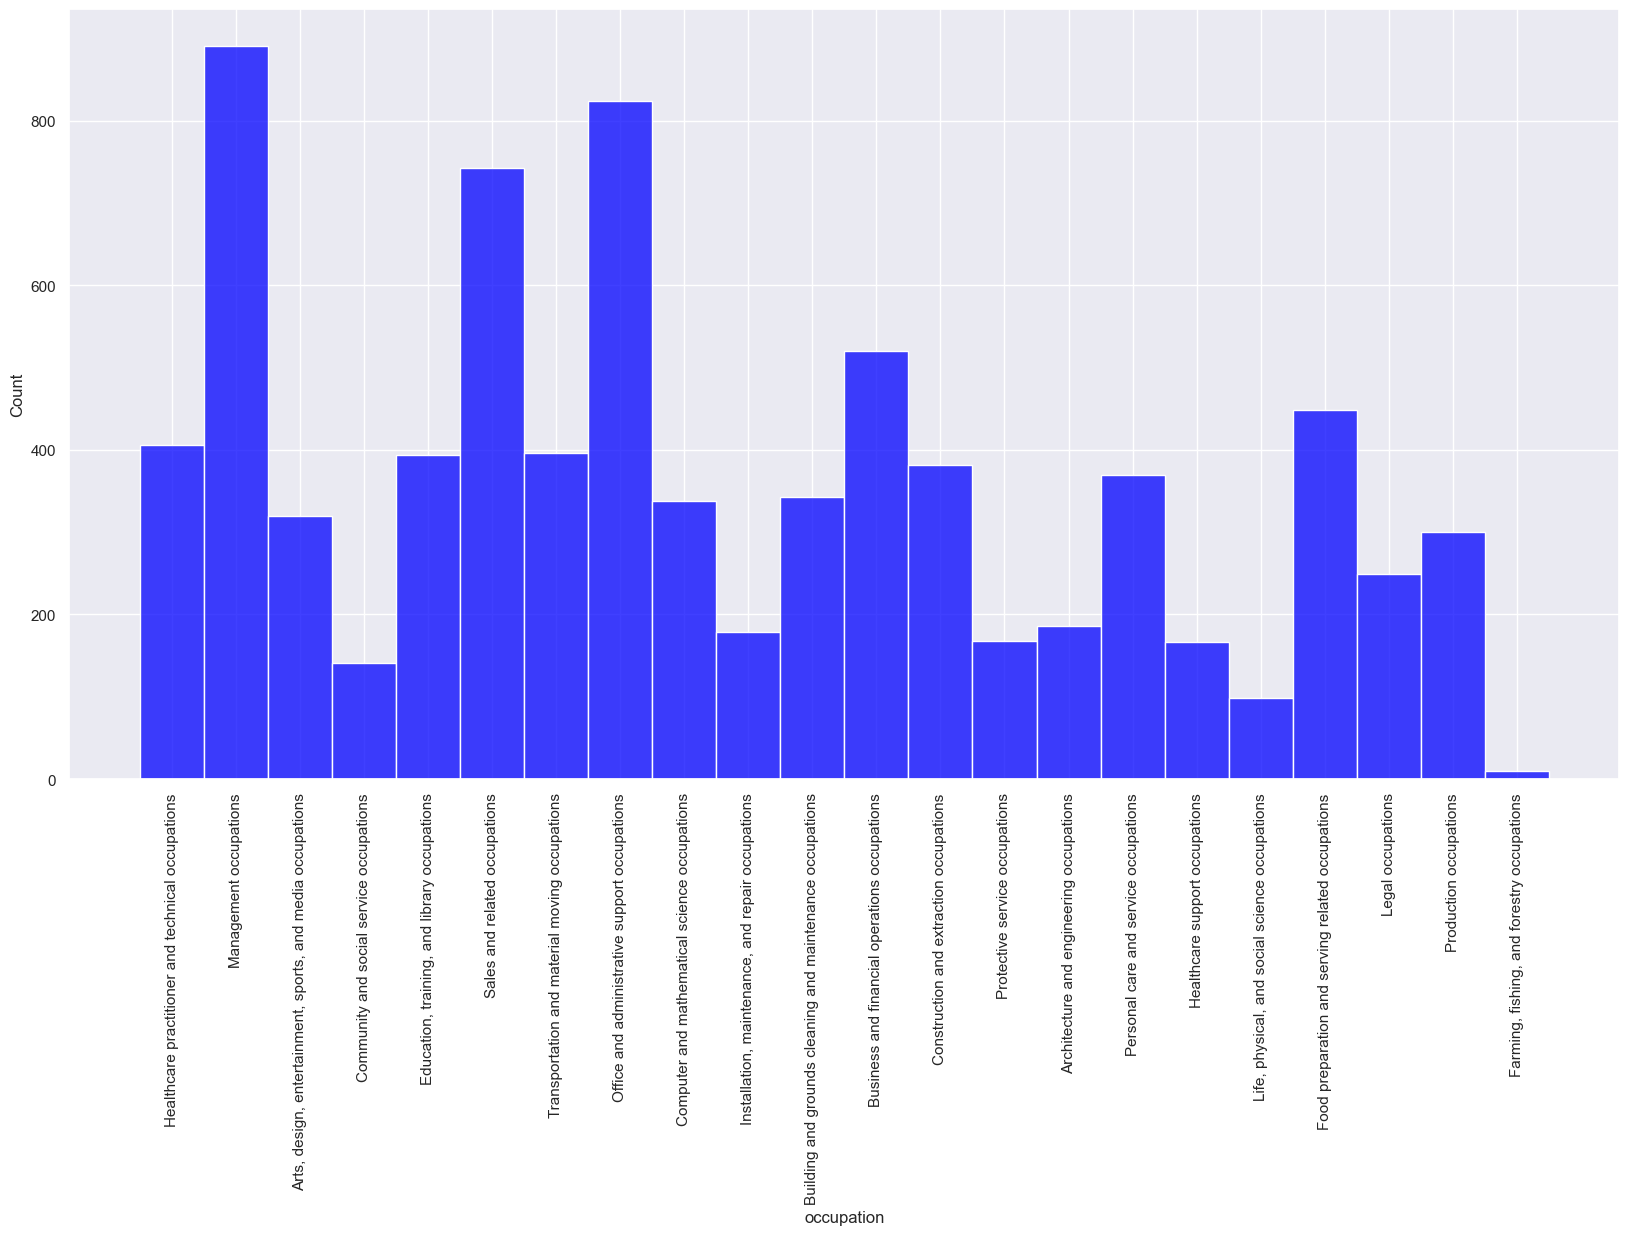

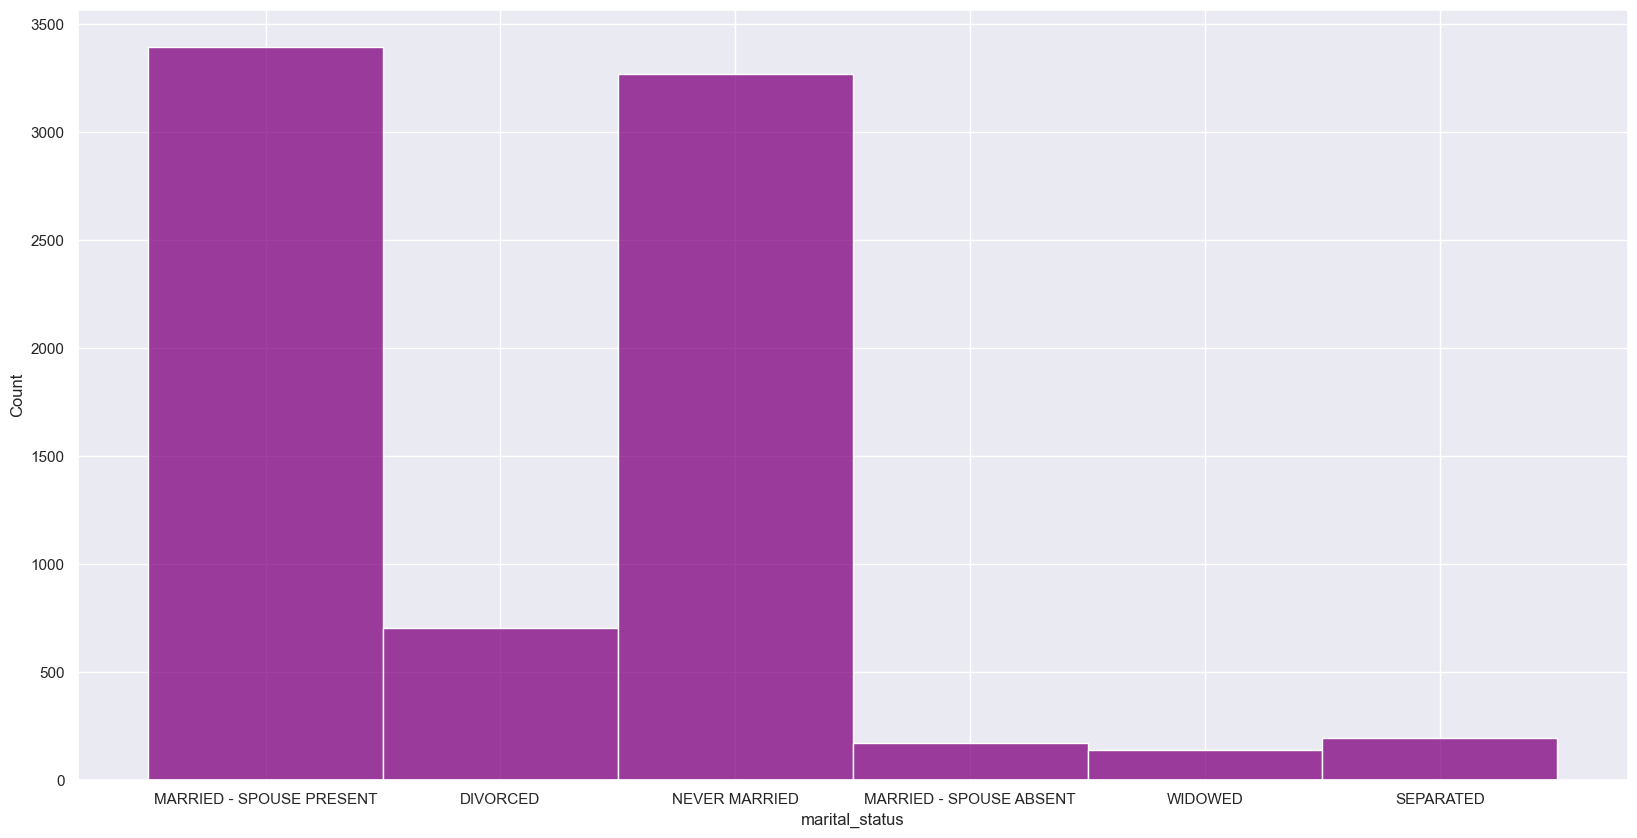

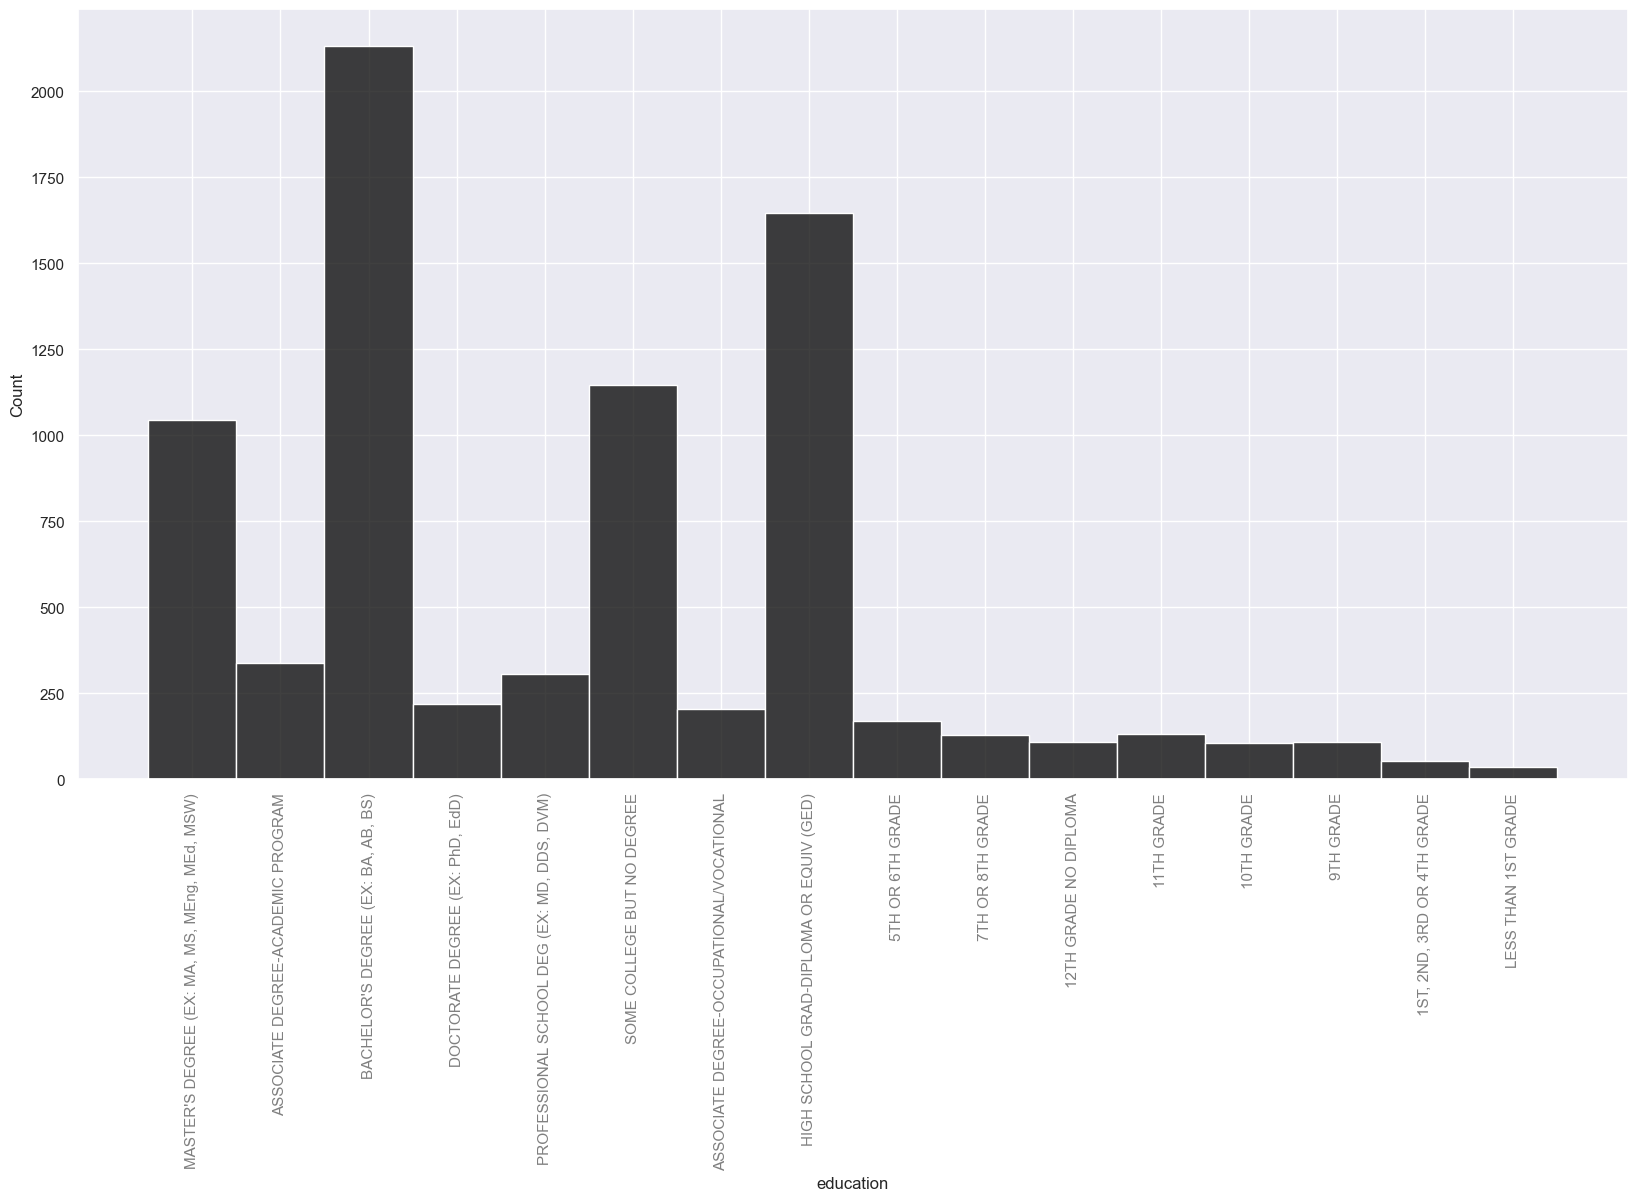

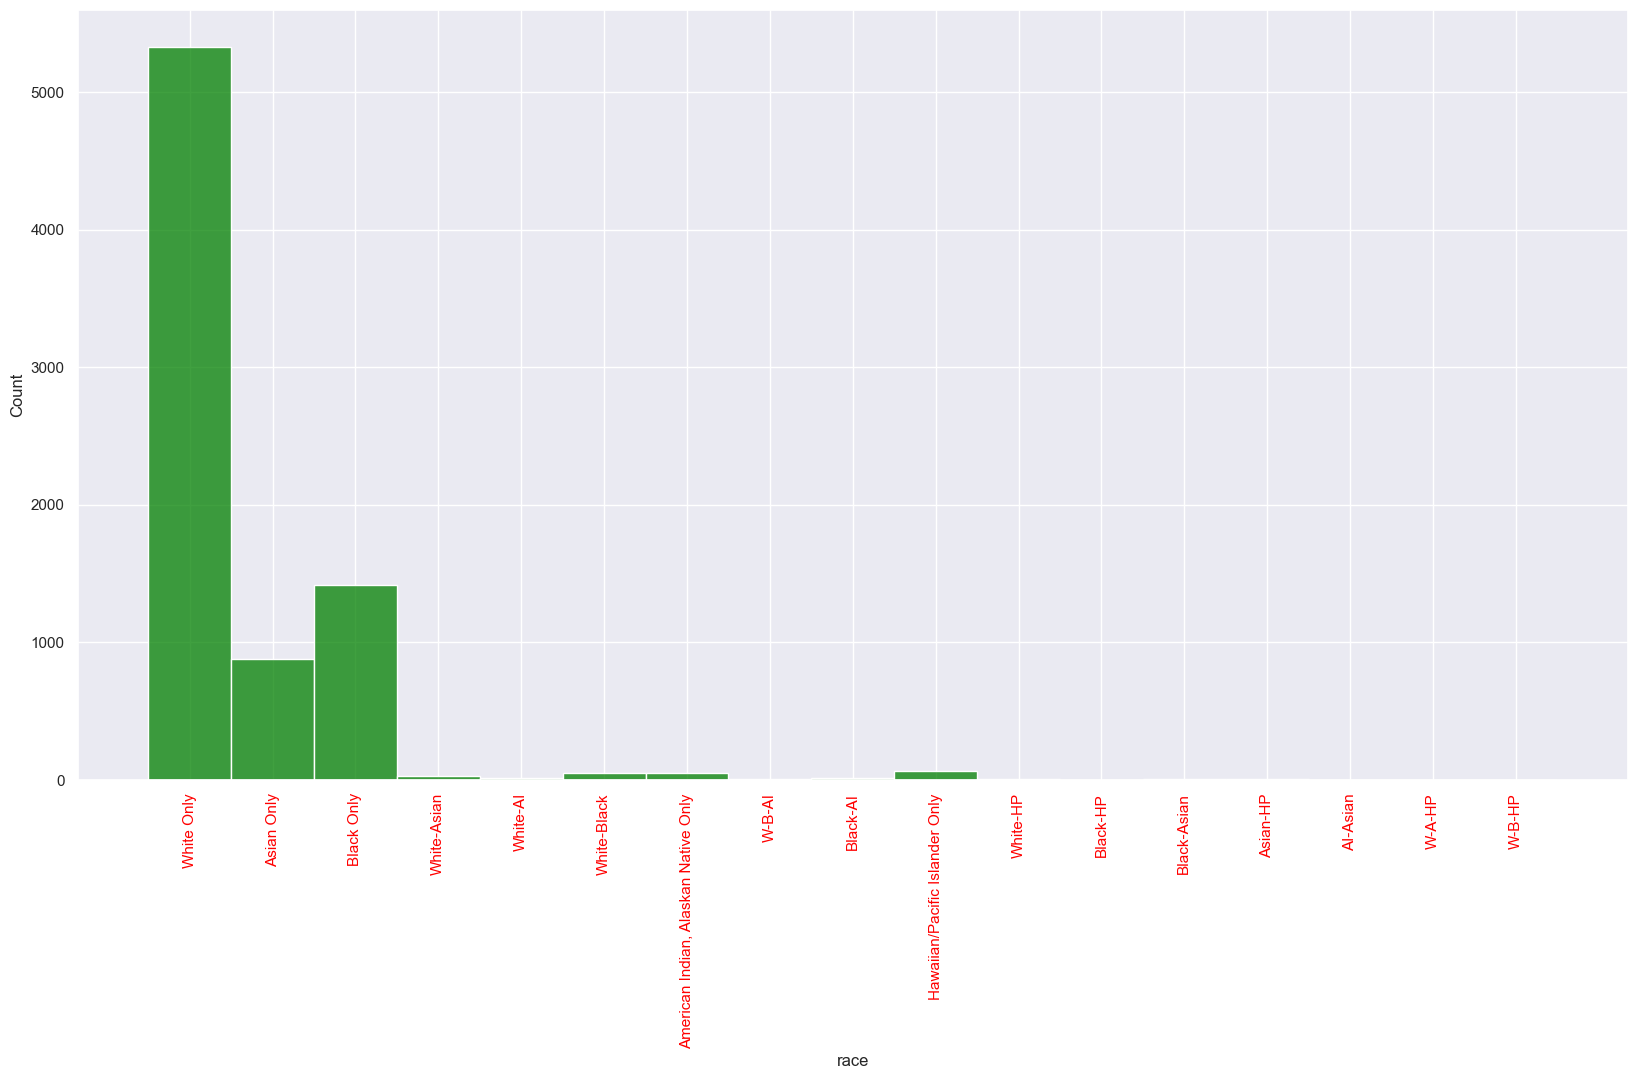

In [7]:
fig_numerical, axes_numerical = plt.subplots(1,2, figsize=(20,10))
axes_numerical[0].hist(raw_df['hours_a_week'])
axes_numerical[0].set_title('Hours a week Hist')
axes_numerical[1].hist(raw_df['age'])
axes_numerical[1].set_title('Age  Hist')
plt.show()

import seaborn as sns
import plotly.express as px
sns.set_theme(style='darkgrid')
fig_industry, ax_industry = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
ax_industry.tick_params(axis='x', labelrotation=90)
sns.histplot(raw_df['industry'], color='red',ax=ax_industry)
sns.histplot(raw_df['occupation'], color='blue',ax=ax_industry)

fig_occupation, ax_occupation = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
ax_occupation.tick_params(axis='x', labelrotation=90)
sns.histplot(raw_df['occupation'], color='blue',ax=ax_occupation)

fig_marital, ax_marital = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
sns.histplot(raw_df['marital_status'], color='purple',ax=ax_marital)

fig_education, ax_education = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
sns.histplot(raw_df['education'], color='black',ax=ax_education)
ax_education.tick_params(axis='x', labelrotation=90, labelcolor='gray')

fig_race, ax_race = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
sns.histplot(raw_df['race'], color='green',ax=ax_race, )
ax_race.tick_params(axis='x', labelrotation=90, labelcolor='red')

px.histogram(raw_df,'metropolitan')

## Preprocessing

### Replace value for cols

In [8]:
'''
We can use 
+map function: data['sex'].replace({0:'Female',1:'Male'},inplace=True)
+apply function: data['sex'] = data['sex'].apply({1:'Male', 0:'Female'}.get)
+replace function: data['sex']=data['sex'].map({0:'Female',1:'Male'}) -> non-destructive and can run multiple time
'''
#for binary cols
raw_df['sex'].replace({1: 'male', 2: 'female'}, inplace=True)
raw_df['ft/pt'].replace({1: 'full-time', 2: 'part-time'}, inplace=True)
raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision',
       'diff_climbing_walking','diff_dressing_bathing','disability_issue']] = raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision','diff_climbing_walking','diff_dressing_bathing','disability_issue']].replace({1: 1, 2: 0})
raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision',
       'diff_climbing_walking','diff_dressing_bathing','disability_issue']] = raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision','diff_climbing_walking','diff_dressing_bathing','disability_issue']].astype(bool)
print(raw_df.head())

   person_id  age     sex      ft/pt  hours_a_week  deaf_diff_hearing  \
0       4964   51    male  full-time            50              False   
1       5069   39  female  full-time            40              False   
2       5068   40    male  full-time            40              False   
3       5199   56  female  full-time            40              False   
4       5712   46    male  full-time            60              False   

   blind_diff_seeing_glass  diff_concerntrating_remembering_decision  \
0                    False                                     False   
1                    False                                     False   
2                    False                                     False   
3                    False                                     False   
4                    False                                     False   

   diff_climbing_walking  diff_dressing_bathing  disability_issue  \
0                  False                  False            

## Start Decision Tree Set Up

   age  hours_a_week  deaf_diff_hearing  blind_diff_seeing_glass  \
0   51            50              False                    False   
1   39            40              False                    False   
2   40            40              False                    False   
3   56            40              False                    False   
4   46            60              False                    False   

   diff_concerntrating_remembering_decision  diff_climbing_walking  \
0                                     False                  False   
1                                     False                  False   
2                                     False                  False   
3                                     False                  False   
4                                     False                  False   

   diff_dressing_bathing  disability_issue  female  male  ...  \
0                  False             False       0     1  ...   
1                  False             Fal

<AxesSubplot: xlabel='ft/pt', ylabel='Count'>

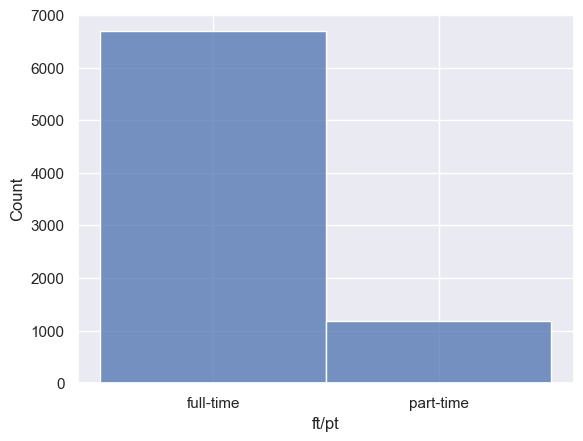

In [9]:
processed_df = raw_df.drop(['person_id'], axis=1).copy()

X = processed_df.drop(['ft/pt'], axis=1)
X = pd.get_dummies(X, prefix='', prefix_sep='',drop_first=False)
print(X.head())
y = processed_df['ft/pt']

sns.histplot(y)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6298, 162) (1575, 162) (6298,) (1575,)


## Decision Tree for classification FT/PT label

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=13)
model.fit(X_train, y_train)
predicted = model.predict(X_test)

accuracy = accuracy_score(y_test, predicted)
print(f'Model accuracy score: {accuracy}')

Model accuracy score: 0.9847619047619047


In [12]:
print(type(model.feature_importances_))
print(type(X.columns.to_numpy()))
temp_df = pd.DataFrame({'feature': X.columns.to_numpy(), 'importance': model.feature_importances_})
print(temp_df)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
                                      feature  importance
0                                         age    0.013136
1                                hours_a_week    0.916175
2                           deaf_diff_hearing    0.000000
3                     blind_diff_seeing_glass    0.000000
4    diff_concerntrating_remembering_decision    0.000000
..                                        ...         ...
157                   Seattle-Tacoma-Bellevue    0.000000
158           Tampa-St. Petersburg-Clearwater    0.000000
159                         Vallejo-Fairfield    0.001039
160       Virginia Beach-Norfolk-Newport News    0.001055
161           Washington-Arlington-Alexandria    0.001061

[162 rows x 2 columns]


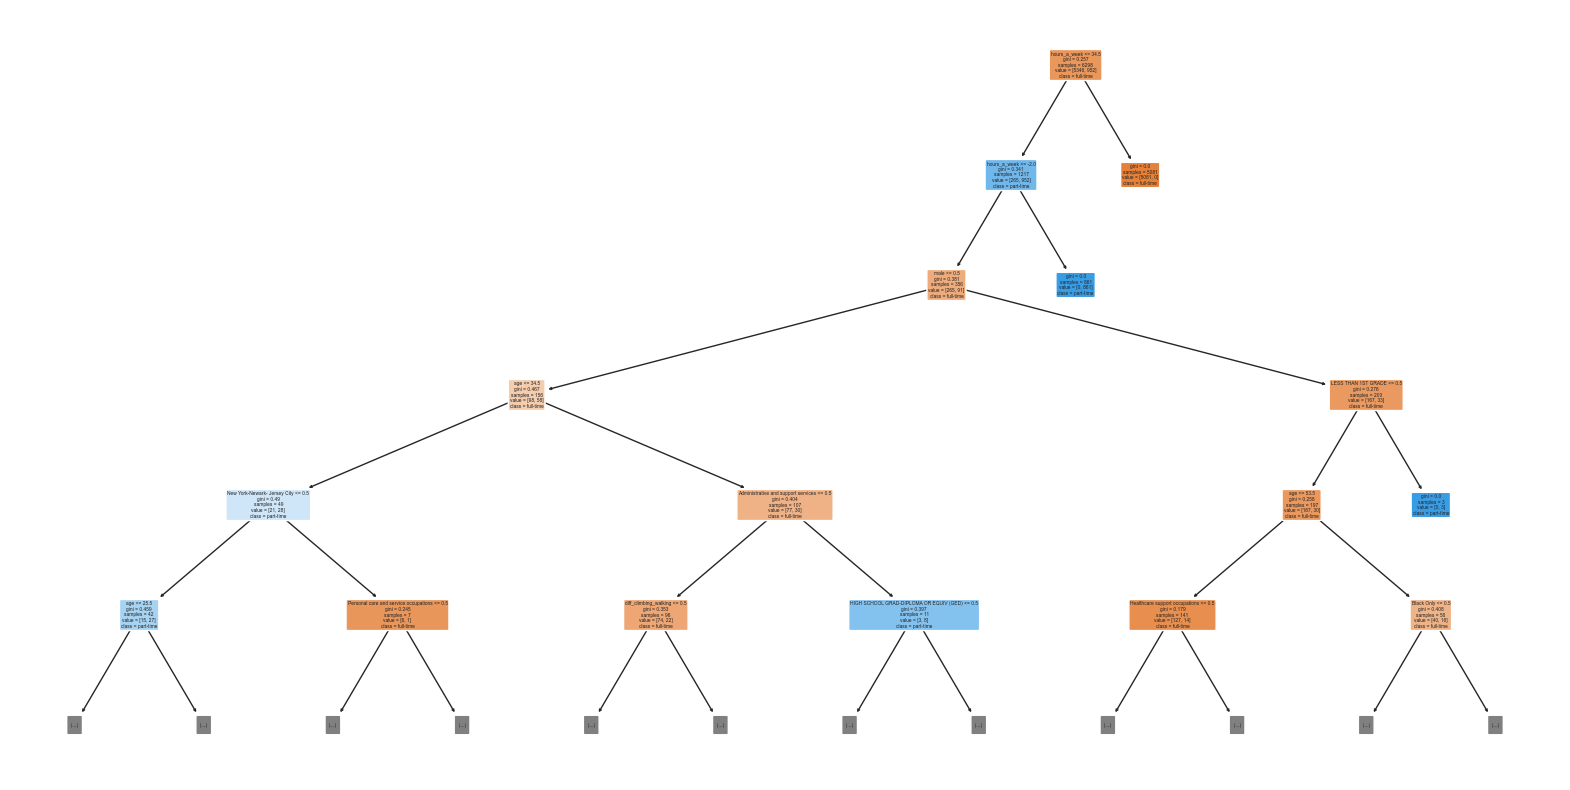

In [13]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (20, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, class_names=['full-time', 'part-time'], max_depth=5)
plt.show()